<Body>   
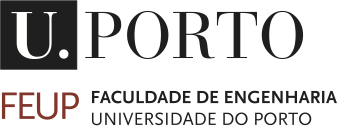   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Mar. 2022

---


# Notebook 09: Deep Learning

## Introduction
[PyTorch](https://pytorch.org) become a synonymous of Deep Learning since it provides people with an easy way to work with data, design models, optimize model parameters, and to use the trained models. This nodebook will introduce you to a simple machine learning workflow, implemented in [PyTorch](https://pytorch.org/tutorials/beginner/basics/intro.html): the libraries and additional parts that are needed to train a neural network (a simple classifier); however,there are many more details/concepts to explore or learn about deep learning. 

A model has a life-cycle that provides the backbone for both modeling a dataset and understanding the PyTorch API. The five steps in the life-cycle are as follows:

1. Define the Model.
2. Prepare the Data.
3. Train the Model.
4. Evaluate the Model.
5. Make Predictions.


<center style="width: 80%"><img src="https://pytorch.org/assets/images/pytorch-logo.png" width="150px"></center>


## Continuous XOR problem:

Given two binary inputs $x_1$ and $x_2$, the label to predict is $1$ if either $x_1$ or $x_2$ is $1$ while the other is $0$, or the label is $0$ in all other cases. The XOR example became famous by the fact that a single neuron, i.e. a linear classifier, cannot learn this simple function. Considering that variables $x_1$ and $x_2$ are continuous and have (gaussian) noise, the decision boundary of this problem looks as follows. 



<left style="width: 100%">
<img src="https://www.researchgate.net/profile/Walter-Nakamura/publication/326961066/figure/fig2/AS:658216065183744@1533942347122/Quadro-1-Tabela-verdade-representando-o-operador-ou-exclusivo.png" width="300px">
</left>








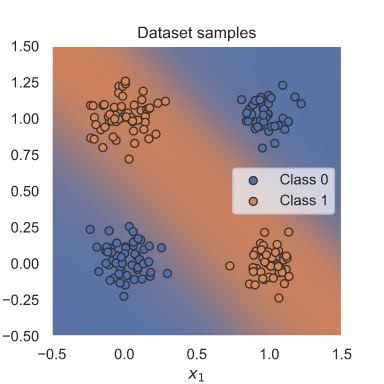

## Define the model

A neural network in PyTorch requires the specification of parameters like, weights and bias vectors, using `Tensors` with an option `requires_grad=True`, for gradients and adjustment of parameters during the training process. 

There is a package called `torch.nn` that defines a classes such as, linear networks layers, activation functions, loss functions  (a complete list can be found [here](https://pytorch.org/docs/stable/nn.html)) which make designing neural networks more convenient. 

The `torch.nn.functional` package contains functions that are used in network layer. The modules available in `torch.nn` actually uses a lot of functionalities from `torch.nn.functional`.



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

A neural network can be build by modules which may contain other modules. In fact, a neural network is considered to be a module itself as well. The basic module template can be defined as:

* $\color{green}{init}$ method is where the parameters of the module are created during the `nn = MyModule()`, using `nn.Parameter` or by defining other modules that will be later on used by the forward function. Each layer is declared with a unique layer name in this method and, for every unique layer, declaring its input features and output features is a must.

* $\color{green}{forward}$ method is where the computation of the module is performed. This method connects the layers that were declared in the **init** method. Be aware that, the output feature of one layer is an input feature of its next connecting layer. This function is executed when the module is called: `nn(x)`. 


In [2]:
class MyModule(nn.Module):
  
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        return



#### The model of the ANN
Consider a network composed by a input layer, a hidden layer with tanh as activation function and a output layer. The $x_1$ and $x_2$ are coordinates of a data point (input layer in blue), the hidden layer neurons are shown in white, and the output neuron in red.

<center width="100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width="300px"></center>

Pre-defined modules of the `torch.nn` package can be used to design such a model: 

In [3]:
class XOR_Classifier_Module(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1         = nn.Linear(num_inputs, num_hidden)
        self.activation_f1   = nn.Tanh()
        self.linear2         = nn.Linear(num_hidden, num_outputs)
        self.activation_sig  = nn.Sigmoid()           #  COMMENT if nn.BCEWithLogitsLoss is selected.

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.activation_f1(x)
        x = self.linear2(x)
        x = self.activation_sig(x)                   #  COMMENT if nn.BCEWithLogitsLoss is selected. 
        return x

This neural network model has two input neurons and four hidden neurons. This model shall be used for binary classification and, therefore, the model will have only one output neuron. 

Note: if you prefer, you may not apply a sigmoid on the output. This is because other functions, especially the loss, are more efficient and precise to calculate on the original outputs instead of the sigmoid output. We will discuss the detailed reason later.

In [4]:
model = XOR_Classifier_Module(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

XOR_Classifier_Module(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (activation_f1): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
  (activation_sig): Sigmoid()
)


The parameters of a module can be obtained by using its `parameters()` functions, or `named_parameters()` to get a name to each parameter object. 

* each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. 

* the tanh activation function does not have any parameters. 

Note: that parameters are only registered for `nn.Module` objects that are direct object attributes, i.e. `self.a = ...`. If you define a list of modules, the parameters of those are not registered for the outer module and can cause some issues when you try to optimize your module. There are alternatives, like `nn.ModuleList`, `nn.ModuleDict` and `nn.Sequential`, that allow you to have different data structures of modules.

Moreover, model parameters can be obtained by using `state_dict()` which provides the current values of all parameters.

In [5]:
# Specific model parameters
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

# All model parameter
model.state_dict()   #PyTorch assigns random values to these weights and biases

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


OrderedDict([('linear1.weight', tensor([[-0.7060, -0.6355],
                      [ 0.5760,  0.5352],
                      [-0.6678, -0.0038],
                      [ 0.1275, -0.6910]])),
             ('linear1.bias', tensor([ 0.2587, -0.5385, -0.6653,  0.0987])),
             ('linear2.weight',
              tensor([[ 0.0050,  0.2569,  0.4982, -0.3167]])),
             ('linear2.bias', tensor([0.2898]))])

### Prepare data

The package `torch.utils.data` provides some functionalities to load the training and test data, mainly, through `data.Dataset`, and `data.DataLoader` classes. 
* the [dataset class](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) provides an uniform interface to access the training/test data
* the data loader makes sure to efficiently load and stack the data points from the dataset into batches during training.

In [6]:
import torch.utils.data as data

SEED = 1234
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

#### Dataset class
This class aims to facilitate the usage of data for training and testing of Pytorch models. 

* `__len__()` function that can be used to get the length of the dataset (number of rows or samples). This method has to return the size of the dataset.
* `__getitem__()` function that is used to get a specific sample by index. This method has to return the $i$-th data point in the dataset.

The dataset class for our example can be described as:

In [7]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_data function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_data()

    def generate_data(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Instantiating and visualizing the dataset:

In [8]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.8642, 0.9813]), tensor(0))


In [9]:
import matplotlib.pyplot as plt

def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend(loc="upper right")

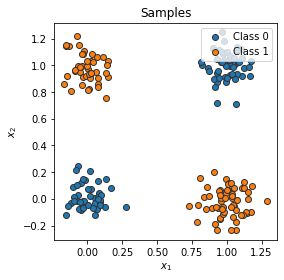

In [10]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### Dataloader class

In most of applications, there is no need to create a DataLoader class since a simple instantiation of this class is enough. The class `torch.utils.data.DataLoader` represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The data loader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch.

An object from the DataLoader class can be configured with the following input arguments (see a complete list [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: Number of samples to stack per batch
* `shuffle`: If True, the data is returned in a random order. This is important during training for introducing stochasticity. 
* `num_workers`: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.
* `pin_memory`: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.
* `drop_last`: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.


An instance of the DataLoader:

In [11]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [12]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the 
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.0420,  1.0250],
        [ 1.0405,  0.0248],
        [ 0.9814,  1.0414],
        [ 1.1480, -0.1043],
        [-0.0770,  0.1021],
        [ 0.0887, -0.0477],
        [-0.0250, -0.0145],
        [-0.0367,  1.0838]])
Data labels torch.Size([8]) 
 tensor([1, 1, 0, 1, 0, 0, 0, 1])


## Train the model
In PyTorch, everything should be explicit and the developer has full control over the models and the training process. In this way, the model training loop is defined by hand. During training, we will perform the following steps:

1. Get a batch from the data loader;
2. Obtain the predictions from the model for the batch;
3. Calculate the loss based on the difference between predictions and labels;
4. Backpropagation: calculate the gradients for every parameter with respect to the loss;
5. Update the parameters of the model in the direction of the gradients.


### Optimization
The optimization model will define the algorithm that shall be used to update the parameters of network's model with respect to the loss calculated on the data (steps 3 and 5). 



#### Loss modules

PyTorch provides a list of predefined loss functions which can be used (see [here](https://pytorch.org/docs/stable/nn.html#loss-functions)).  Common loss functions that can be calculated from a batch include the following:

* [BCELoss](https://pytorch.org/docs/stable/nn.html#torch.nn.BCELoss): Binary cross-entropy loss for binary classification.

* [CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss): Categorical cross-entropy loss for multi-class classification.

* [MSELoss](https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss): Mean squared loss for regression.



The Binary Cross Entropy (BCE) is often used for binary classification and can be defined as follows:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$. PyTorch has two modules: `nn.BCELoss` expects the inputs $x$ to be in the range $[0,1]$ (e.g., the output of a sigmoid), and the `nn.BCEWithLogitsLoss` combines a sigmoid layer and the BCE loss in a single class. This last version is numerically more stable than using a plain sigmoid followed by a BCE loss because of the logarithms applied in the loss function. Hence, it is adviced to use loss functions applied on "logits" where possible (remember to not apply a sigmoid on the output of the model in this case!). For our model defined above, the model `nn.BCELoss` will be used however, the `nn.BCEWithLogitsLoss` would be preferably (the sigmoid activation funtion needs to be removed in this case from the NN model). 

In [13]:
loss_module =  nn.BCELoss() # or nn.BCEWithLogitsLoss()  nn.BCELoss()

#### Optimizer: Stochastic Gradient Descent

PyTorch provides the package `torch.optim` for updating the parameters that has implementations of popular optimizers. 
Stochastic gradient descent `torch.optim.SGD` is used for optimization, and the standard algorithm is provided by the SGD class, although other versions of the algorithm are available, such as [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam).  The Stochastic Gradient Descent  updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). The SDG slowly moves towards the direction of minimizing the loss. 

In [14]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

The optimizer provides two useful functions: 
* `optimizer.step()`. The step function updates the parameters based on the gradients as explained above.
* `optimizer.zero_grad()` which sets the gradients of all parameters to zero. If the `backward` method is called on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.

### Training Loop

To train the model, you have to loop over our data iterator, feed the inputs to the network, and optimize. First, let's create a larger dataset and specify a DataLoader with a larger batch size. 

In [15]:
train_dataset = XORDataset(size=5000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

For computational efficiency, it is possible to push all data and model parameters to a physical device. The device will be an Nvidia GPU if exists on your machine, or your CPU if it does not. PyTorch does not have a dedicated library for GPU but it is possible to manually define the executing device. 

In [16]:
# Push model to device. Has to be only done once
# Define your execution device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")

# Convert model parameters and buffers to CPU or CUDA
model.to(device)

The model will be running on cuda:0 device


XOR_Classifier_Module(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (activation_f1): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
  (activation_sig): Sigmoid()
)

Pytorch provides two relevant methods to train or evaluate models:
* `model.train()`
* `model.eval()`

Setting the model to **training mode** is done by calling `model.train()`. There exist certain modules that need to perform a different forward step during training than during testing (e.g. BatchNorm and Dropout).

In [17]:
from tqdm.notebook import trange, tqdm

def train_model(model, optimizer, dataloader, loss_criteria, num_epochs=200):
    # Set model to train mode
    model.train() 
    
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in dataloader:
            
            ## Step 0 (needed in case of GPU): Move input data to device 
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 1: setting gradients to zero. The gradients would not be overwritten but actually added to the existing ones.
            optimizer.zero_grad() 
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            #preds = torch.sigmoid(preds)  # UNCOMMNET if nn.BCEWithLogitsLoss is selected.  Sigmoid to map predictions between 0 and 1. Be aware that the l
            
            ## Step 3: Calculate the loss
            loss = loss_criteria(preds, data_labels.float())
            
            ## Step 4: Perform backpropagation
            loss.backward()
            
            ## Step 5: Update parameters based on the calculated gradients
            optimizer.step()

            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()
            
        # Add average loss to TensorBoard
        epoch_loss /= len(data_loader)

        if epoch % 5 == 0:    
            print('[%d] loss: %.3f' % (epoch + 1, epoch_loss))

In [18]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/200 [00:00<?, ?it/s]

[1] loss: 1.114
[6] loss: 1.097
[11] loss: 1.076
[16] loss: 1.039
[21] loss: 0.986
[26] loss: 0.900
[31] loss: 0.797
[36] loss: 0.675
[41] loss: 0.537
[46] loss: 0.415
[51] loss: 0.324
[56] loss: 0.254
[61] loss: 0.204
[66] loss: 0.170
[71] loss: 0.143
[76] loss: 0.123
[81] loss: 0.108
[86] loss: 0.096
[91] loss: 0.086
[96] loss: 0.077
[101] loss: 0.071
[106] loss: 0.064
[111] loss: 0.060
[116] loss: 0.056
[121] loss: 0.052
[126] loss: 0.048
[131] loss: 0.046
[136] loss: 0.043
[141] loss: 0.041
[146] loss: 0.039
[151] loss: 0.037
[156] loss: 0.036
[161] loss: 0.034
[166] loss: 0.032
[171] loss: 0.031
[176] loss: 0.030
[181] loss: 0.029
[186] loss: 0.028
[191] loss: 0.026
[196] loss: 0.026


#### Saving a model

Save the model to disk at the end of the training stage. It will be possible to load the weights of the network at a later time. Remember that, `state_dict` provides all learnable parameters. The method `torch.save` makes it possible to save the model.

In [19]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-2.3143, -2.1826],
        [ 1.9496,  1.7865],
        [-3.5532,  2.5287],
        [ 1.9974, -3.3036]], device='cuda:0')), ('linear1.bias', tensor([ 0.4215, -0.1270, -0.9257, -0.5444], device='cuda:0')), ('linear2.weight', tensor([[-2.6497,  1.9523,  4.7339,  4.6745]], device='cuda:0')), ('linear2.bias', tensor([0.4797], device='cuda:0'))])


In [20]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

#### Loading a model
The method `torch.load` can be used to load the *state_dict* from the disk. The `load_state_dict` is able to overwrite the current parameters of the model with the new values. A detailed tutorial on saving and loading models in PyTorch can be found [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

In [21]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = XOR_Classifier_Module(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-2.3143, -2.1826],
        [ 1.9496,  1.7865],
        [-3.5532,  2.5287],
        [ 1.9974, -3.3036]], device='cuda:0')), ('linear1.bias', tensor([ 0.4215, -0.1270, -0.9257, -0.5444], device='cuda:0')), ('linear2.weight', tensor([[-2.6497,  1.9523,  4.7339,  4.6745]], device='cuda:0')), ('linear2.bias', tensor([0.4797], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-2.3143, -2.1826],
        [ 1.9496,  1.7865],
        [-3.5532,  2.5287],
        [ 1.9974, -3.3036]])), ('linear1.bias', tensor([ 0.4215, -0.1270, -0.9257, -0.5444])), ('linear2.weight', tensor([[-2.6497,  1.9523,  4.7339,  4.6745]])), ('linear2.bias', tensor([0.4797]))])


### Test the model

The test dataset is used for evaluating the performance of the model that was previously trained. The test dataset for this example will be consisted of randomly generated data points. The procedure also uses the Dataset and the DataLoader classes.

In [22]:
# Create Samples
test_dataset = XORDataset(size=500)

# Create DataLoader for the test set. drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=True) 

Let's use the accuracy as a metric, which is calculated as follows:

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives. 

For the evaluation:
1. deactivate the computation graph using `with torch.no_grad(): ...`
2. set the model to eval mode.

In [23]:
def eval_model(model, data_loader):
    # Set model to eval mode
    model.eval() 

    true_preds, num_preds = 0., 0.
    
    # Deactivate gradients for the following code
    with torch.no_grad(): 

        # get batch of images from the test DataLoader
        for data_inputs, data_labels in data_loader:
            ## Step 0 (needed in case of GPU): Move input data to device
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)

            # Step 1: determine prediction of model
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # Output is [Batch size, 1], but we want [Batch size]
            #preds = torch.sigmoid(preds)  # UNCOMMNET if nn.BCEWithLogitsLoss is selected.  Sigmoid to map predictions between 0 and 1. Be aware that the l

            # Step 2: Binarize predictions to 0 and 1
            pred_labels = (preds >= 0.5).long() 
            
            # Step 3: Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
       
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [24]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


The score should be close to 100% accuracy if the model is performing well.

## Visualizing classification boundaries

The decision boundary define regions where the model is uncertain. It is possible to perform a prediction for every data point in a range of $[-0.5, 1.5]$ to estimate the classification boundaries that are being defined by the model.

The following picture shows where the model has created decision boundaries, and which points would be classified as $0$ or $1$:
 *  blue regions mean class 0
 *  orange regions mean class 1
 


/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


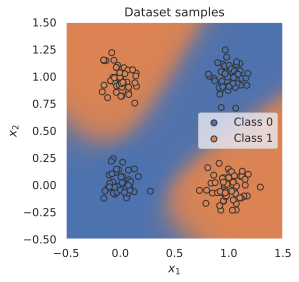

In [25]:
## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()


@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    
    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    #preds = torch.sigmoid(preds)   # UNCOMMNET if nn.BCEWithLogitsLoss is selected. 
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

Let's use this method to train a model as before, with a new model and optimizer.

--------------

## **Activity 1**

Considering the previous model of a neural network:
1. Increase the standard deviation of the samples created by the''class XORDataset(data.Dataset)'' to 0.2 and 0.3. Discuss the results.
2. Implement a new model formed by one input layer + three fully connected layers (4, 8 and 4 nodes each) +  one output layer.
3. Replace the activation function fom Tanh to ReLU and the optimizer algoritm from SGD to Adam.
4. For a multi classification problem (>2 classes), discuss the changes that must be applied to the previous model.
5. For a regression problem, discuss the changes that must be applied to the previous model.

-----------------

### Additional references:

CITS4012 Natural Language Processing, Department of Computer Science and Software Engineering at the University of Western Australia. [link text](https://weiliu2k.github.io/CITS4012/index.html)
